In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# read data from csv (may excel, txt, ...)

In [3]:
df = pd.read_csv('../Data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:title={'center':'Weight and Height'}, xlabel='Height', ylabel='Weight'>

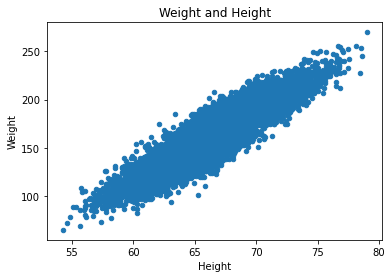

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height')

# Take data from Height and Weight column, convert to array
## convert horizontal vector to vertical vector (reshape)

In [11]:
X = np.asarray(df['Height']).reshape(-1, 1)
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [12]:
y = np.asarray(df['Weight']).reshape(-1, 1)
y 

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

# Train model
## sklearn (Scikit Learn for Machine learning)

In [13]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

# Result:
## Hệ số góc của đường thẳng là coef_, còn gọi là weight
## Hệ số tự do (hệ số chặn) của đường thẳng là intercept_, còn gọi là bias

In [14]:
# slope of line, weight
w = regression.coef_

In [15]:
# intercept factor, bias
b = regression.intercept_ 

# create a new array x to draw line

In [27]:
x = np.linspace(55, 80, 100).reshape(-1,1) # linspace(x_start, x_end, number of points)
x

array([[55.        ],
       [55.25252525],
       [55.50505051],
       [55.75757576],
       [56.01010101],
       [56.26262626],
       [56.51515152],
       [56.76767677],
       [57.02020202],
       [57.27272727],
       [57.52525253],
       [57.77777778],
       [58.03030303],
       [58.28282828],
       [58.53535354],
       [58.78787879],
       [59.04040404],
       [59.29292929],
       [59.54545455],
       [59.7979798 ],
       [60.05050505],
       [60.3030303 ],
       [60.55555556],
       [60.80808081],
       [61.06060606],
       [61.31313131],
       [61.56565657],
       [61.81818182],
       [62.07070707],
       [62.32323232],
       [62.57575758],
       [62.82828283],
       [63.08080808],
       [63.33333333],
       [63.58585859],
       [63.83838384],
       [64.09090909],
       [64.34343434],
       [64.5959596 ],
       [64.84848485],
       [65.1010101 ],
       [65.35353535],
       [65.60606061],
       [65.85858586],
       [66.11111111],
       [66

# calculate predict value of model

In [18]:
yhat = regression.predict(x)

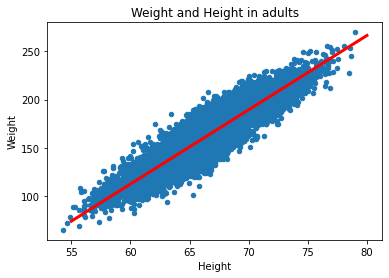

In [19]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

# Loss Function / Hàm mất mát

## Use mean_squared_error of module sklearn.metrics

In [13]:
y_pred = regression.predict(X)

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred, squared=False)

12.218571272826035

# R_squared index
## R -> 1 (model -> good)

In [49]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8551742120609958

# Train Test Split

## Tự động chia data thành tập huấn luyện và tập kiểm thử theo tỉ lệ yêu cầu

In [23]:
from sklearn.model_selection import train_test_split

## 20% to test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train again

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

## Tính giá trị dự đoán cho tập test và tập train (thường thì chỉ cần tính giá trị cho tập test)

In [57]:
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

## Tính giá trị loss function trên tập huấn luyện

In [58]:
mean_squared_error(y_train, y_train_pred, squared=False)

12.291215418059755

## Tính loss function trên tập kiểm thử

In [59]:
mean_squared_error(y_test, y_test_pred, squared=False)

11.923764784387522

## Nhận xét: loss trên tập test nhỏ hơn loss trên tập train => Goodfitting

## Tương tự với chỉ số R bình phương

In [60]:
r2_score(y_train, y_train_pred)

0.8547101510161353

In [61]:
r2_score(y_test, y_test_pred)

0.8569823856544043

In [ ]:
# Có thể chỉ cần tính loss và R bình phương trên tập test là đủ